# Motivation
In this project we have been investigating if the municipality of Copenhagen are fullfilling the following two principles of their tree policy:
1. There must be planted more trees in Copenhagen 
2. There should be a large variation in tree species in Copenhagen 

We thought this could be an exciting topic to investigate, because we both love nature and green enviroments. We also both live in Copenhagen and therefore it could be interesting to use our new data visualisations skills on something we could relate to. The tree policy of Copenhagen actually contain 5 principles. However, we were only able to examine two of them due to no/missing registration of when trees are being cut down. 

To carry out the analysis of the two selected tree policy principles, we have been working with the following datasets:
- 'trae_bases.csv' from the municipality of Copenhagen containing information about trees in Copenhagen. More specificaly it is dataset which contains the year a tree is planted, the species and where in the city it is planted. The dataset is retrieved from https://www.opendata.dk/. 
- From https://kk.statistikbank.dk/statbank5a/default.asp?w=1536 we have retrieved three datasets containing demographics of the districts of Copenhagen. The demographics include average income per yer per district, number of persons in each district with a certain education level and the area sizes (in km2) of the districts. 

We have chosen these four datasets because they can be used to answer the two main questions of our analysis. Furthermore, with the data of average income and study time per district we have been able to also explore the demographics in the districts of Copenhagen and see if it has any influence on the trees being planted. Finally with the dataset of the district sizes, we were able to examine the number of trees being planted in each district relative to size. 

The goal for our investigation was to give people a thourough analysis of the questions of interest through an exciting story with a lot of visualisations available online. 

# Basic statistics
All four datasets have been preprocessed in the file called "Read_data_new.ipynb". 

Trae_basis: 
In this dataset we first looked at the variables and discarded the ones we did not find necesarry for our analysis. Then we chose to only use data from the time period 2000 and 2020, since too old data would be of no use to answer if the municipality of Copenhagen is fullfilling their tree policy today. Furthermore, the quality of the data might not be as good when looking further back in time. The trae_basis data set actually contained data beyond 2020. However the demographics data sets only contained data up to 2020, so in order to merge the datasets we had to restrict the tree data to only include up to 2020 also. All the data variables were then changed to english instead of danish in order for us to reach a broader audience. The next step were to extract the geo data from a string and create a latitude and longitude variable. With the preprocessing complete we saved the dataframe as a csv file called "df_tree" so it was ready to use again. 

2022419113038370864435KKIND3 (income data) and 2022419114031370864435KKUDD2 (education data): 
These two dataset contains information of income and study year for the districts in Copenhagen. The variable names were changed to english and both datasets were restructured to match the df_tree dataset. The study year were calculated as an average of education lengths where the education lengths were set manually by us using our knowledge of the education system in Denmark. Finally, both datasets were saved as csv files like the tree dataset.

2022426114414371694040KKAREAL (size data):
The last dataset contains information of area size in m2 of the districts in Copenhagen. The variable names were changed to english and the area size were calculated in km2 instead. This dataset were also saved as a csv file. 

Merged data set: 
For the analysis of the research questions all 4 datasets were merged into one dataset called df_genial and this dataset were used to analyse if Copenhagen are planting more trees. The merged data set called 'df_genial' have year and district as multi-index. Thus the combination of year and district have a value for the number of trees planted, the average income and average number of study years.  
The education dataset only contained data from 2008. In order to keep information from the other datasets in the period 2000-2007, we did an outer join when merging. 

Below the header of the tree data and the merged data set are shown. 

In [14]:
import pandas as pd 
df_tree = pd.read_csv('data/df_tree.csv')
df_genial = pd.read_csv('data/df_genial.csv')

In [15]:
df_tree.head()

,id,type,species,year,district,street,street_location,X,Y
0,2755,Gade- og allétræer,Platan,2008,Vanløse,Sallingvej,Siderabat,12.506473,55.693255
1,79754,Gade- og allétræer,Lind,2005,Valby,Mølle Allé,Fortov,12.517024,55.665249
2,84790,Gade- og allétræer,Lind,2018,Valby,Mølle Allé,Fortov,12.517473,55.665156
3,6881,Gade- og allétræer,Robinie,2008,Vesterbro-Kongens Enghave,Dannebrogsgade,Fortov,12.552988,55.669186
4,6883,Gade- og allétræer,Løn,2012,Vesterbro-Kongens Enghave,Dannebrogsgade,Fortov,12.552826,55.669425


In [16]:
df_genial.head()

,year,district,number_planted_trees,species,Formede træer,Gade- og allétræer,Park- og naturtræer,Private træer,Træer i bevoksninger,area_km2,trees_km2,avg_income,avg_study_year
0,2000,Amager Vest,20,7,0.0,18.0,2.0,0.0,0.0,19.370227,1.032512,156386.0,NaN
1,2001,Amager Vest,84,7,0.0,73.0,5.0,0.0,6.0,19.370227,4.336552,162951.0,NaN
2,2002,Amager Vest,45,5,0.0,45.0,0.0,0.0,0.0,19.370227,2.323153,167013.0,NaN
3,2003,Amager Vest,176,4,0.0,176.0,0.0,0.0,0.0,19.370227,9.086109,170857.0,NaN
4,2004,Amager Vest,3,2,0.0,3.0,0.0,0.0,0.0,19.370227,0.154877,176206.0,NaN


The basis statistics of the merged dataframe is shown below. The statistics is shown for the whole period, i.e 2000-2020 for all columns except average study year which is from the period 2008-2020. 

In [13]:
df_genial[['number_planted_trees','species','area_km2','trees_km2','avg_income','avg_study_year']].describe()

,number_planted_trees,species,area_km2,trees_km2,avg_income,avg_study_year
count,207.000000,207.000000,207.000000,207.000000,207.000000,130.000000
mean,94.014493,8.985507,9.264748,11.310449,220559.140097,13.961397
std,114.950875,6.432229,3.809191,13.642735,40751.199362,0.637697
min,1.000000,1.000000,4.104694,0.114437,149636.000000,12.729431
25%,27.500000,4.000000,6.832786,2.966177,190044.000000,13.487630
50%,67.000000,8.000000,9.233781,7.689158,217677.000000,13.947372
75%,117.500000,12.500000,9.784081,14.501900,247611.000000,14.383784
max,811.000000,48.000000,19.370227,82.245040,351805.000000,15.280457


All exploratory visualisations can be found on our website, but here is a sample of those visualisations that led to our modeling and conclusions. 

Below two visualisations from the exploratory analysis of the first research question is shown. 

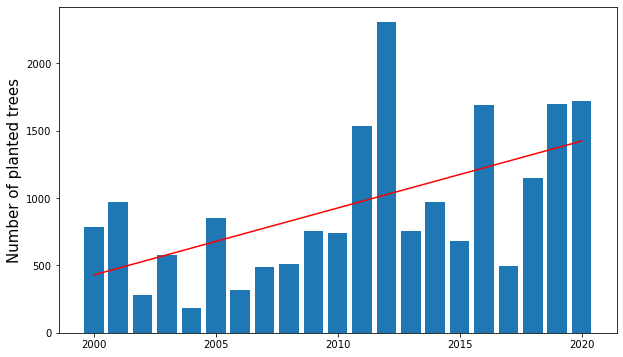

In [20]:
from scipy import stats
import matplotlib.pyplot as plt 

df_year = df_tree.groupby(['year']).size() # get number of trees planted per year 
slope, intercept, r_value, p_value, std_err = stats.linregress(df_year.index.to_list(),df_year.values) # for trend curve

# plot 
plt.figure(figsize=(10,6))
plt.bar(df_year.index,df_year.values)
plt.plot(df_year.index, slope*(df_year.index) + intercept, 'r-')
plt.ylabel('Number of planted trees',fontsize=15)
plt.show()

In [22]:
# For bokeh visualisations
from bokeh.plotting import figure
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import show, output_notebook, reset_output
from bokeh.models import ColumnDataSource, HoverTool, Legend
from bokeh.layouts import row

# Line plot showing trees planted per km2 in each district from 2000 to 2020
df_grøn = df_genial[['year','district','trees_km2']]
df_km2_year = pd.pivot_table(df_grøn, values='trees_km2', index='year', columns=['district'], fill_value=0)

df_districts = df_tree.groupby(["year", "district"]).size().reset_index()
districts = df_districts.district.unique()

# BOKEH 
reset_output() # If you are having issues with visualizing Bokeh plots in the notebook try to uncomment this line
# prepare data for bokeh plot
#Create empty figures

p1 = figure(plot_width = 900, plot_height = 500, title = "Number of trees planted per km2 for each district", 
            x_axis_label = "Year", y_axis_label = "Number of trees per km2") 


#colors
colors = ["red", "blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"]
#Create empty list for custom legend
items1 = []

#Add line by using p.line
line ={}
# Pivot table for number of unique species in each district over the years 
df_km2_year = pd.pivot_table(df_grøn, values='trees_km2', index='year', columns=['district'], fill_value=0)

# Insert fraction values in bars
for indx, i in enumerate(districts):
    line[indx] = p1.line(x=df_km2_year.index, y = df_km2_year[i], width=1.5, color = colors[indx], muted =True)
    #Append items to create the legend
    items1.append((districts[indx], [line[indx]]))


#This is to manage the legend in plot
#add the legend outside the plot
legend = Legend(items=items1, location="top_left")
p1.add_layout(legend, 'left')

p1.legend.click_policy = "mute" #you can also try "hide"
p1.title.text_font_size = "20px"


output_notebook()
show(p1)

Loading BokehJS ...

These two visualisations showed that the number of trees planted seemed to have a positive trend over the last 20 years. The second plot showed a possible difference in the number of trees planted per km2 between the districts. 

Below one visualisations from the exploratory analysis of the second research question is shown. 

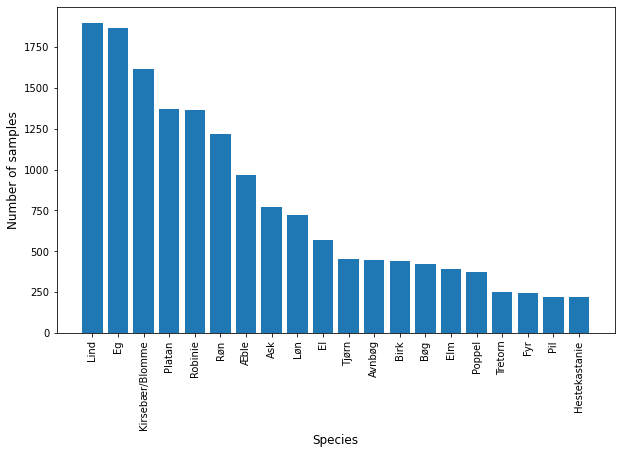

In [24]:
# Plot 3: variation in tree species 
df3 = df_tree.groupby(['species']).size().sort_values(ascending=False).reset_index(name='counts')
df3 = df3.iloc[1:21]
plt.figure(figsize = (10,6))
plt.bar(df3["species"],df3['counts'])
plt.ylabel('Number of samples',fontsize=12)
plt.xlabel('Species', fontsize=12)
plt.xticks(rotation=90)
plt.show()

This plot shows the count of the top 20 species planted in Copenhagen in the period 2000-2020. The plot shows that the municipality of Copenhagen are planting many trees of different species, instead of focusing on only one species. However some trees are being planted more often than others. 

# Data analysis
Our data analysis is split into two research questions "More trees planted over the years?" and "Large variation in tree species?". 

First research question: 

In the first analysis the goal was to investigate if the municipality are plating more trees over. During this investigation we quickly discovered that overall there was a trend showing more and more trees were planted. We therefore got curious and wanted to test if this also was the case when looking at the different districts in Copenhagen. We tested this with a pairwise statistical test (Tukey's), which infact showed there was a statistical difference in number of trees planted in Østerbro and Nørrebro after 2007 compared to the reamining districts. 

Next we wanted to investigate if the municipality in Copenhagen is prioritising richer districts when it comes to planting trees. Before looking at if and how the average income of the districts might be related to the number of trees being planted, we examined if there actually is a significant difference in income between the districts. This was examined by a linear model with income as response variable and the districts and year as explanatory variable. The model showed a clear significant difference between average income in the districts. 

Finally we fitted a linear regression model with trees per km2 as response and the districts, average income, year and their interactions as explanatory variables. For this model, we did a boxcox transformation of the response variable 'trees_km2' to get it normally distributed. A histogram of the response variable before and after transformation is seen below. 

The model was reduced according to ANOVA test with type II partitioning until we only had a model with significant effects. These turned out to be districts and year, and thus average income showed not to have any effect on the number of trees being planted in the districts. 

By a post exploratory analysis we discovered that the large amount of trees planted in Nørrebro and Østerbro after 2007 were mainly in parks and new city areas. 

0.1985693427988897
number of bins:  15


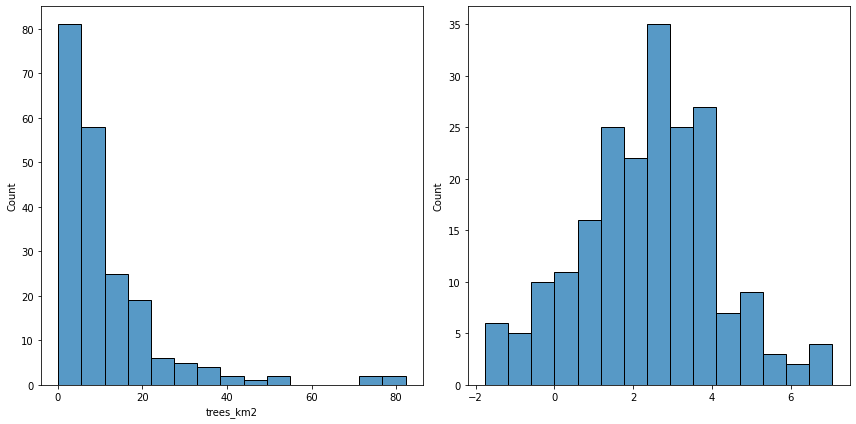

In [27]:
import numpy as np
import seaborn as sns

# Histogram of response variable - should be normal distributed for GLM
# Before and after boxcox transformation 
y_transform, lambda_fitted = stats.boxcox(df_genial['trees_km2']) # boxcox transformation
print(lambda_fitted)
nbins = int(np.ceil(np.sqrt(df_genial.shape[0])))
print('number of bins: ', nbins)

fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.histplot(df_genial['trees_km2'], bins = nbins, ax=axes[0])
sns.histplot(y_transform, bins = nbins, ax=axes[1])
plt.tight_layout()
plt.show()

Second research question: 

In the second analysis we wanted to investigate if the municipality are having a large variation in tree species. This analysis was based on observations from the visualisations and the data. We started with a plot showing how many trees of differnet species were platend for top 20 species in the time period 2000 to 2020 in Copenhagen (showed earlier in this notebook). Then we looked at the variation of tree species in each of the 10 districts - both using bar charts and boxplots. It was found that the two districts Indre By and Østerbro had a dominating tree species and the distribution of tree species were less spread out. Then we examined where the dominating tree species were planted in the two districts. It was found that Lind (the dominating tree species in Indre By) was planted mainly on streets and avenues. At Østerbro the dominating tree species (Eg) was more spread out in parks and on the streets. 

Finally we looked at the number of unique species being planted for each district over time. 

All of the above visualisations and findings made us answer the research question. 

# Genre
<!-- Which genre of data story did you use?
Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?-->

The main genre of our data story is magasine style due to the amount of text accompanying the visualisations and the clear ordering/path of the story. However, after the introduction, there is a bit freedom for the reader since there is two path for the story - either by reading the section "More trees planted over the years?" or the section "Large variation in tree species?". The idea is though that the reader should go through both sections and the conclusion can not be understood without reading both. 

The 3 categories mentioned in Segel and Heer for Visual Narrative is visual structuring, highlighting and transition guidance.

Regarding visual structuring, our story follows a consistent visual platform. Besides the main sections there are no real meachanisms that can help the viewer to identify his/hers position within the story. From start, the reader can see everything that is in the story and thus get an overview of the scope of the story. In terms of highlighting, we use feature distinction by using consistent colors for the 10 districts such that they can not only be recognized by name but also by color. Also we use motion through the two heatmaps over time and furthermore the two heatmaps and all bokeh plots have a zoom function. We have no transition guidance other than the section headlines which underlines a transition to a new question of interest. 

When thinking about the narrative structure of our story, the ordering is a mix of linear and user directed. When the user has chosen one of the two research questions besides introduction and conclusion, the ordering of the story is linear and chosen by us (the authors). Regarding interactivity, we use both hover highlighting, filtering/selection/search and explicit instructions. Hover lighting is when the reader choose a district and its grapgh is highlighted on the visualisation. Selection is when the reader selects a page for viweing a visualisation for a given district. Finally the text provides suggestions to the reader selections on the interactive graphs. About the messaging, the story includes section headlines as already mentioned. Also, the visualisations are accompanyed by text ala an article to make the reader comprehend the story better. However, the visualisations are the main driver of the story and each text bite is refering to visualisations and connecting them. Finally the story includes an introduction section to motivate the analysis and some times through the story we wrap up main findings so far and thus give a short summary of the story.   

Link to Segel and Heer: http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf) 

# Visualizations
In this project we have been making a lot of visualisations. We have mostly been using bar charts, line plots and heat maps, but we have also used statistical tests and showed outputs from these tests. 

In our project we have used bar charts to visualise distributions of how many trees are being planted and how the variation in tree species are. From the bar chart we quickly get an overview of the distributions which we use to explore the next steps of our analysis. We also used a stacked column chart to illustrate the distribution of tree types in the districts of Copenhagen. Some of the bar charts and the stacked column chart were plotted using the bokeh module in order to make the visualisations interactive and more informative. 

In our project we have used line plots to visualise how things change over time. We visualised how the number of trees planted changed over time for the different districts and how the average income and study year change over time. We also added a fitted line to one of our bar charts in order to visualise the general trend over time. Furthermore, we used line charts to compare variables and see if they correlate. 

We used heat maps to visualise where trees are being planted in differnet periods between 2000 to 2020. These visualisation made it possible to see the exact location of where in the districts trees were being planted and if the municipality had a specific focus. 

We have used statisticals tests throughout the first analysis. We chose to show some of the model summaries and tests in the story notebook. Furthermore we visualised one of the models by plotting the intercept and slope parameters. Finally, we illustrated the model predictions and the residulas from our final model describing the number of trees being planted per km2. This was done in order to illustrate the pros and cons of the model. 


# Discussion

In general, we think our visualisations support our story well and we have succeded with making many of them interactive and comprehensive. Furthermore, we like the structure of our story where we focus on two reasearch questions. 

Regarding the first research question, we made a thorough analysis of the number of planted trees per district and how it relates to the average income of the districts. We succeded with telling the story of our statistcs and modelling by making visualisations of the statistical tests, model parameters, predictions and residuals. 

For the second research question, we used visualisations as our main tool, however we could have extended this analysis with more statistics and/or modelling. The analysis of this question suffers from the very detailed analysis of first question. For future work more statistical analysis including further investigation of demographics could be interesting. 

During our analysis we found that it would also have been interesting to look at how gentrification relates to where and which trees are being planted. Furthermore data of when trees are cut down would have made it possible for us to investigate more principles of the tree policy. This data extension would also have made it possible for us to investigate the exact distribution of trees in the districts instead of only looking at the trees being planted. 


# Contributions

For the following parts of the assigment, a main contributor is assigned. 

Story
- research question 1: 
    - visualtions and making them interactive: Jonas, s174462
    - statistical analysis: Caroline, s174476

- reseach question 2: Jonas, s174462
- Introduction and conclusion: Caroline, s174476

Explainer
- Motivation: Jonas, s174462
- Basic statistics: Caroline, s174476
- Data analysis: Caroline, s174476
- Genre: Caroline, s174476
- Visualisation: Jonas, s174462
- Discussion: both
